# KNN

Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"Zoo.csv")
print("data Shape:",data.shape)
data.tail()

data Shape: (101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.4995

## Variable check

### Find columns with the same values

In [5]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (101, 18)


In [6]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 17
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

Continuous Feature Count 0
[]

Other Features Count: 1
Other Features: ['animal name']

Numeric Data Shape: (101, 17)
Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

Categorical Data Shape: (101, 1)
Categorical Columns: Index(['animal name'], dtype='object')


## Categorical Data - One feature

Bar plot for all categorical

In [7]:
# num_columns = len(categorical_data.columns)
# num_rows = num_columns // 2 + num_columns % 2  # Ensure odd number of columns works correctly
# fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 9))

# pal = sns.color_palette('rainbow')
# for i, column in enumerate(categorical_data.columns):
#     row_index = i // 2
#     col_index = i % 2
    
#     sns.countplot(x=column, data=categorical_data, palette=pal,
#                   order=categorical_data[column].value_counts().index,
#                   ax=axes[row_index, col_index])
    
#     axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=90, fontsize=12)
#     axes[row_index, col_index].set_title(f'{column} Counts')

# # Adjust layout
# plt.tight_layout()
# plt.show()


### Labelencoder to convert categorical data into numeric

In [8]:
cat_data = categorical_data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data[column].value_counts())
    unique_values = categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    


Label Encoding for animal name:
Value: aardvark -> Label: 0 --> Counts: 1
Value: antelope -> Label: 1 --> Counts: 1
Value: bass -> Label: 2 --> Counts: 1
Value: bear -> Label: 3 --> Counts: 1
Value: boar -> Label: 4 --> Counts: 1
Value: buffalo -> Label: 5 --> Counts: 1
Value: calf -> Label: 6 --> Counts: 1
Value: carp -> Label: 7 --> Counts: 1
Value: catfish -> Label: 8 --> Counts: 1
Value: cavy -> Label: 9 --> Counts: 1
Value: cheetah -> Label: 10 --> Counts: 1
Value: chicken -> Label: 11 --> Counts: 1
Value: chub -> Label: 12 --> Counts: 1
Value: clam -> Label: 13 --> Counts: 1
Value: crab -> Label: 14 --> Counts: 1
Value: crayfish -> Label: 15 --> Counts: 1
Value: crow -> Label: 16 --> Counts: 1
Value: deer -> Label: 17 --> Counts: 1
Value: dogfish -> Label: 18 --> Counts: 1
Value: dolphin -> Label: 19 --> Counts: 1
Value: dove -> Label: 20 --> Counts: 1
Value: duck -> Label: 21 --> Counts: 1
Value: elephant -> Label: 22 --> Counts: 1
Value: flamingo -> Label: 23 --> Counts: 1
Val

In [9]:
# # Correlation Plot
# corr_matrix = cat_data.corr(numeric_only=True)
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [10]:
# categorical_columns = categorical_data.columns
# for column in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=categorical_data, x=column, hue='Salary')
#     plt.title(f'Count Plot for {column} with respect to Salary')
#     plt.show()

## Numeric Data

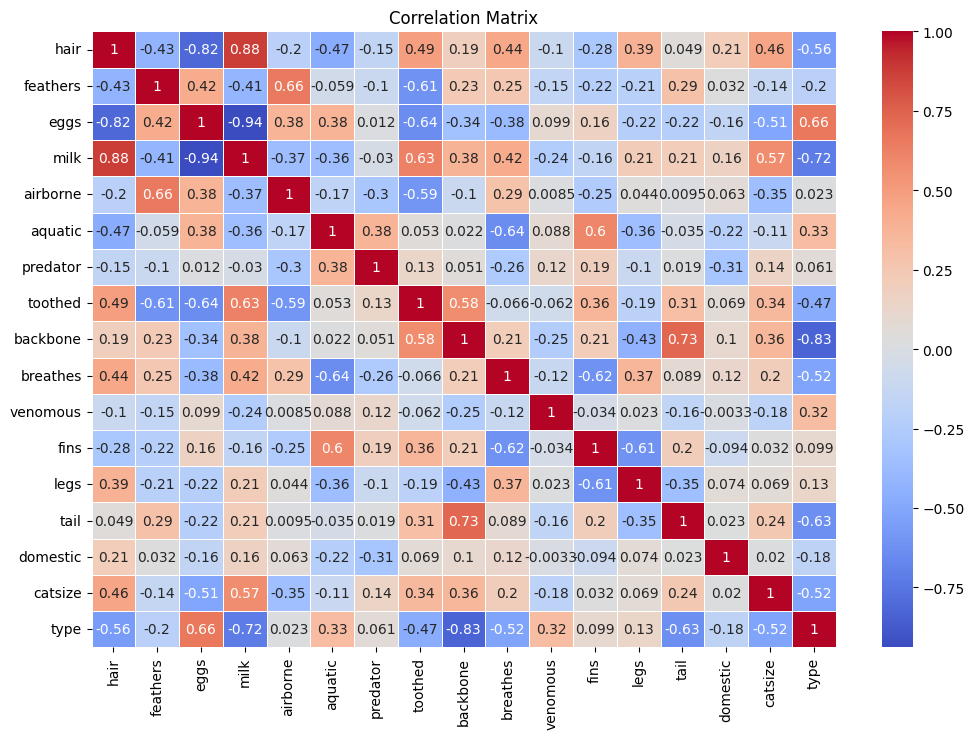

In [11]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

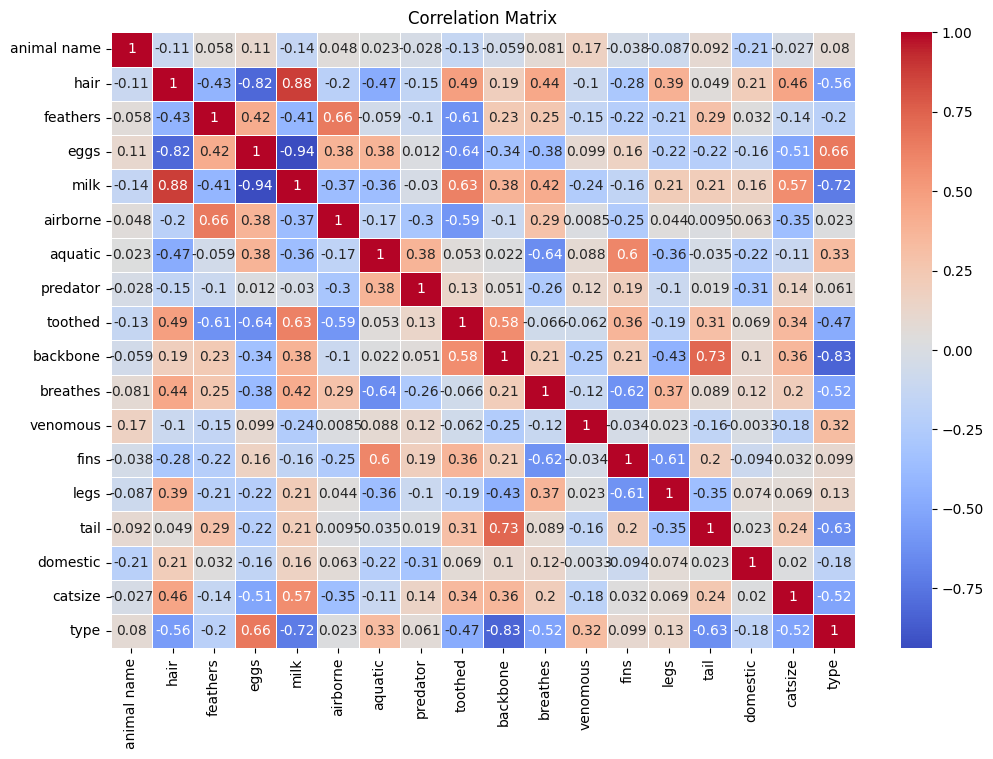

In [12]:
# Correlation Plot with All variable
data_2 = data.copy()
data_2[categorical_data.columns]=cat_data[categorical_data.columns]
corr_matrix = data_2.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

In [13]:
# # relationship plot for categorical data
# sns.pairplot(data= cat_data)
# plt.show()

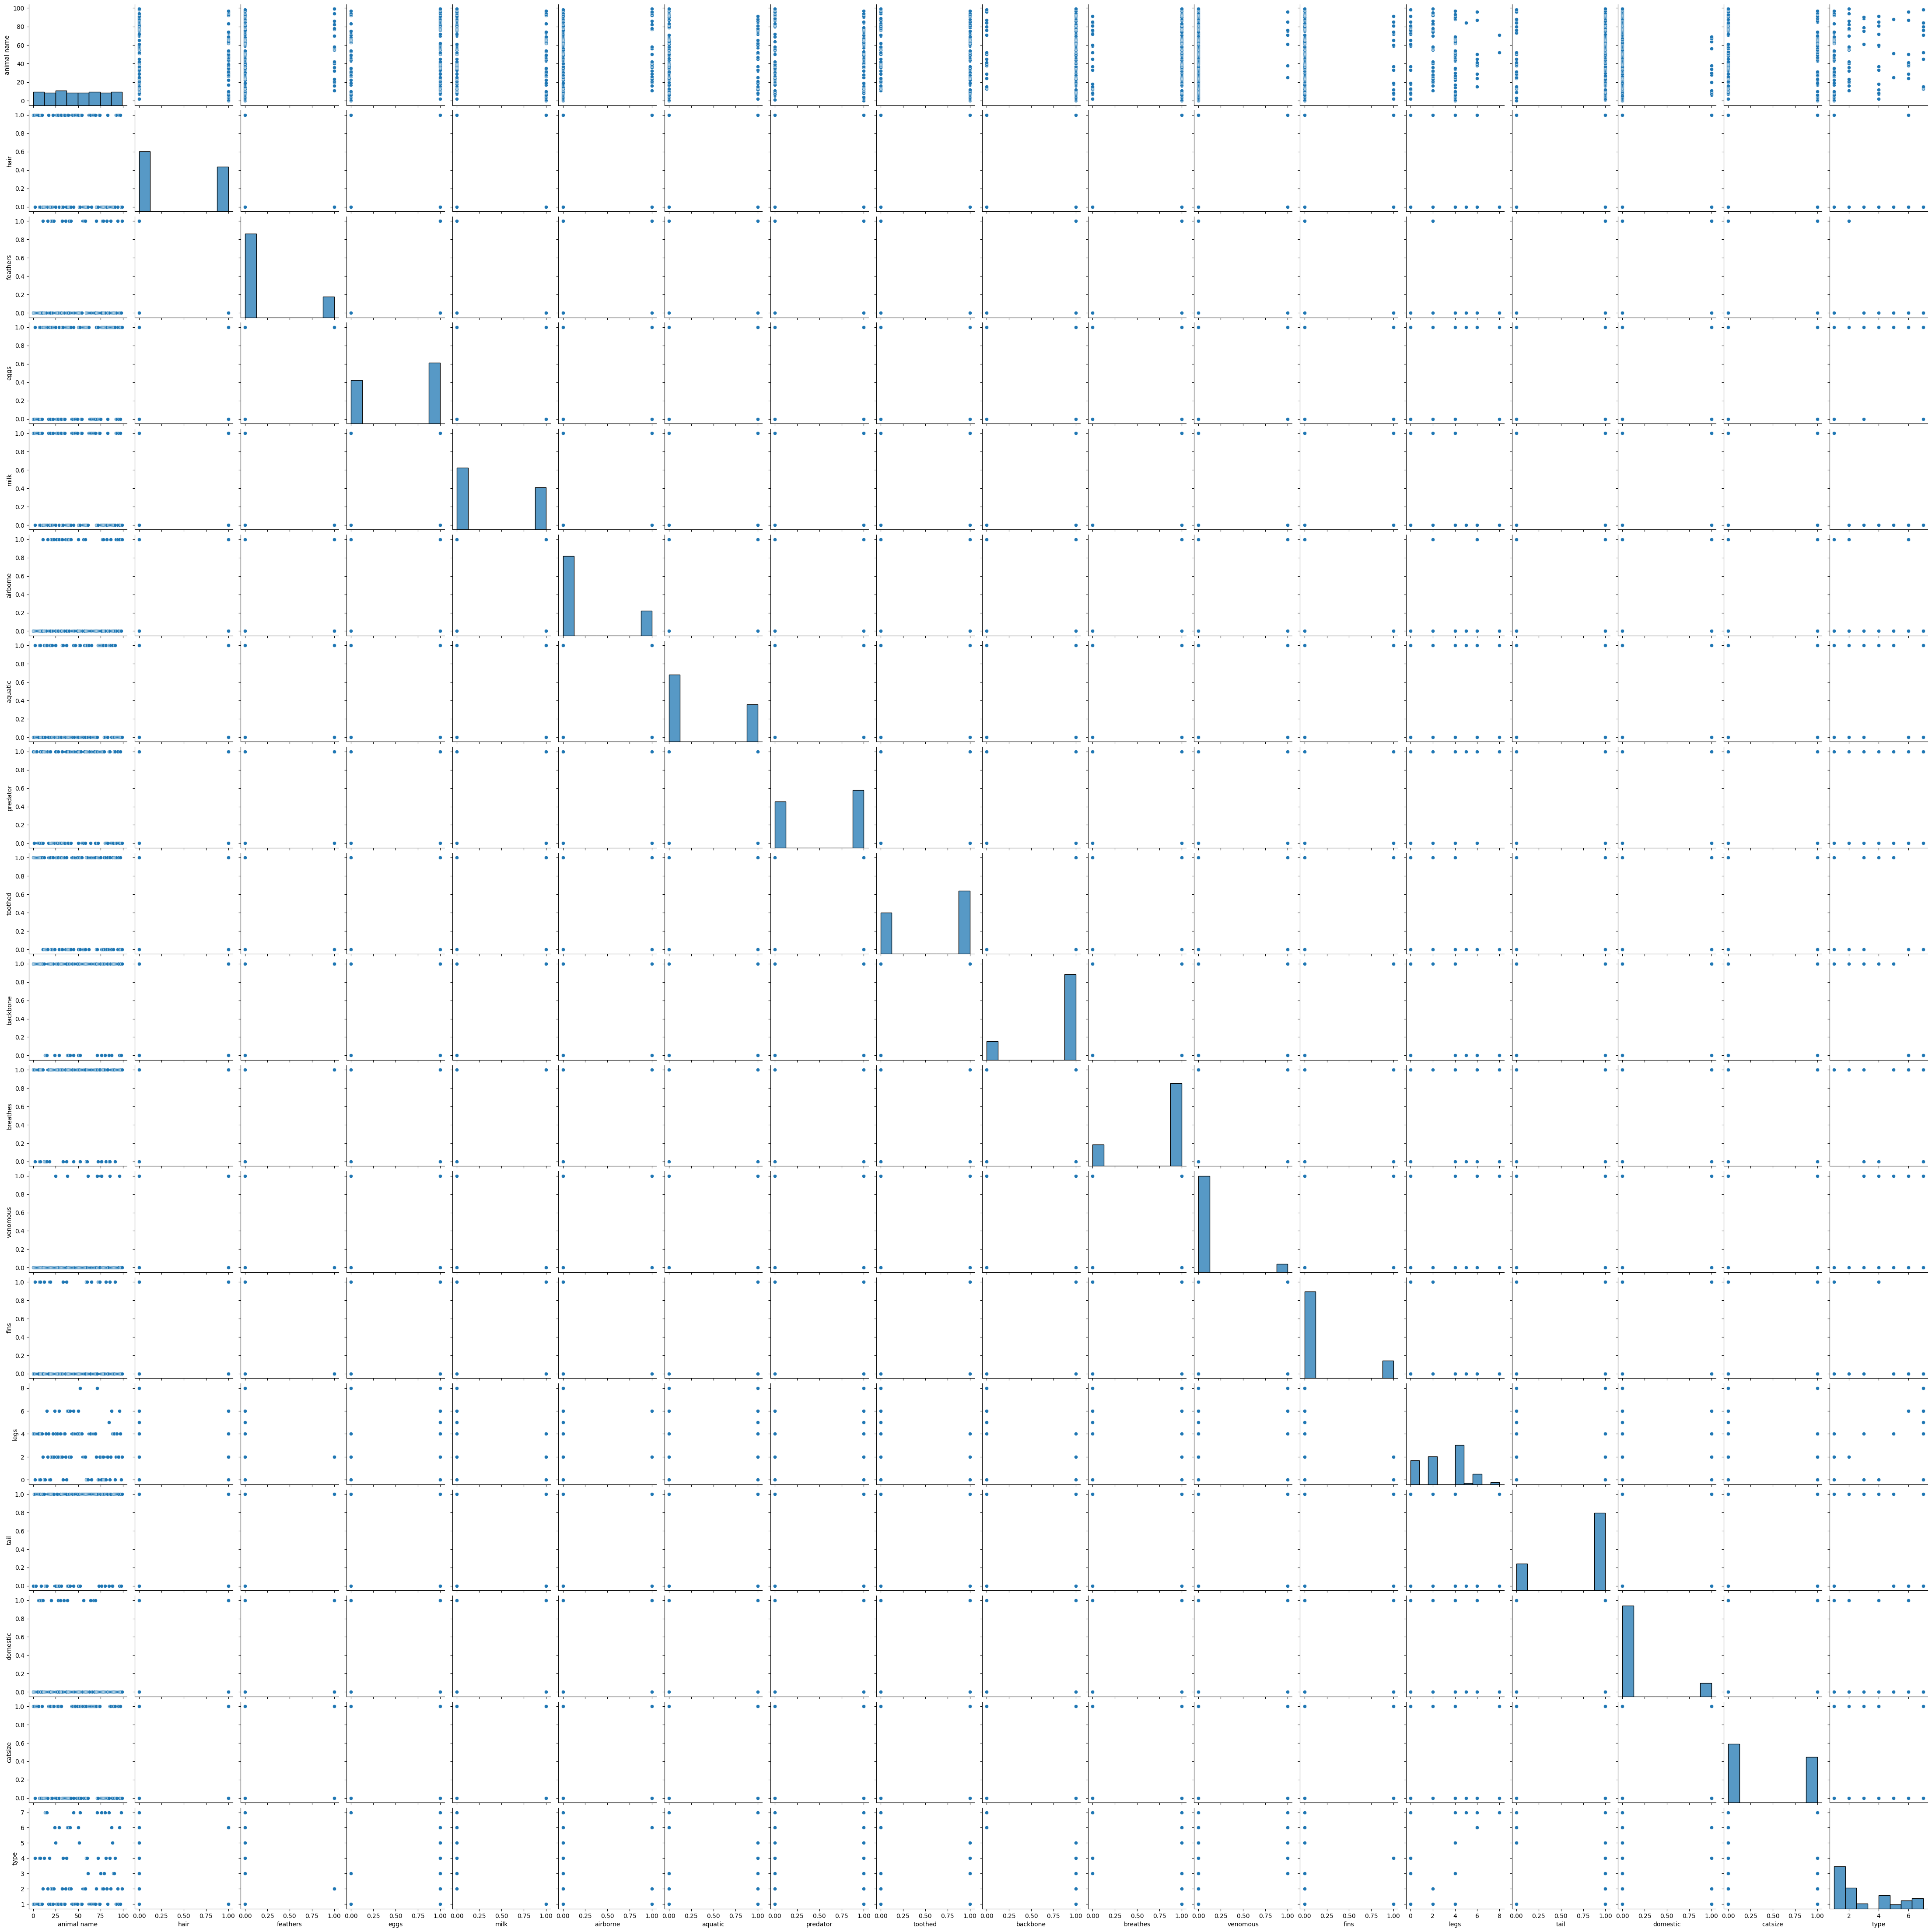

In [14]:
# relationship plot for numeric data
sns.pairplot(data= data_2)
plt.show()

### Detect outliers and handle them

In [15]:
data_filtered=data_2
# data_filtered=pd.concat([numeric_data,cat_data],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(101, 18)

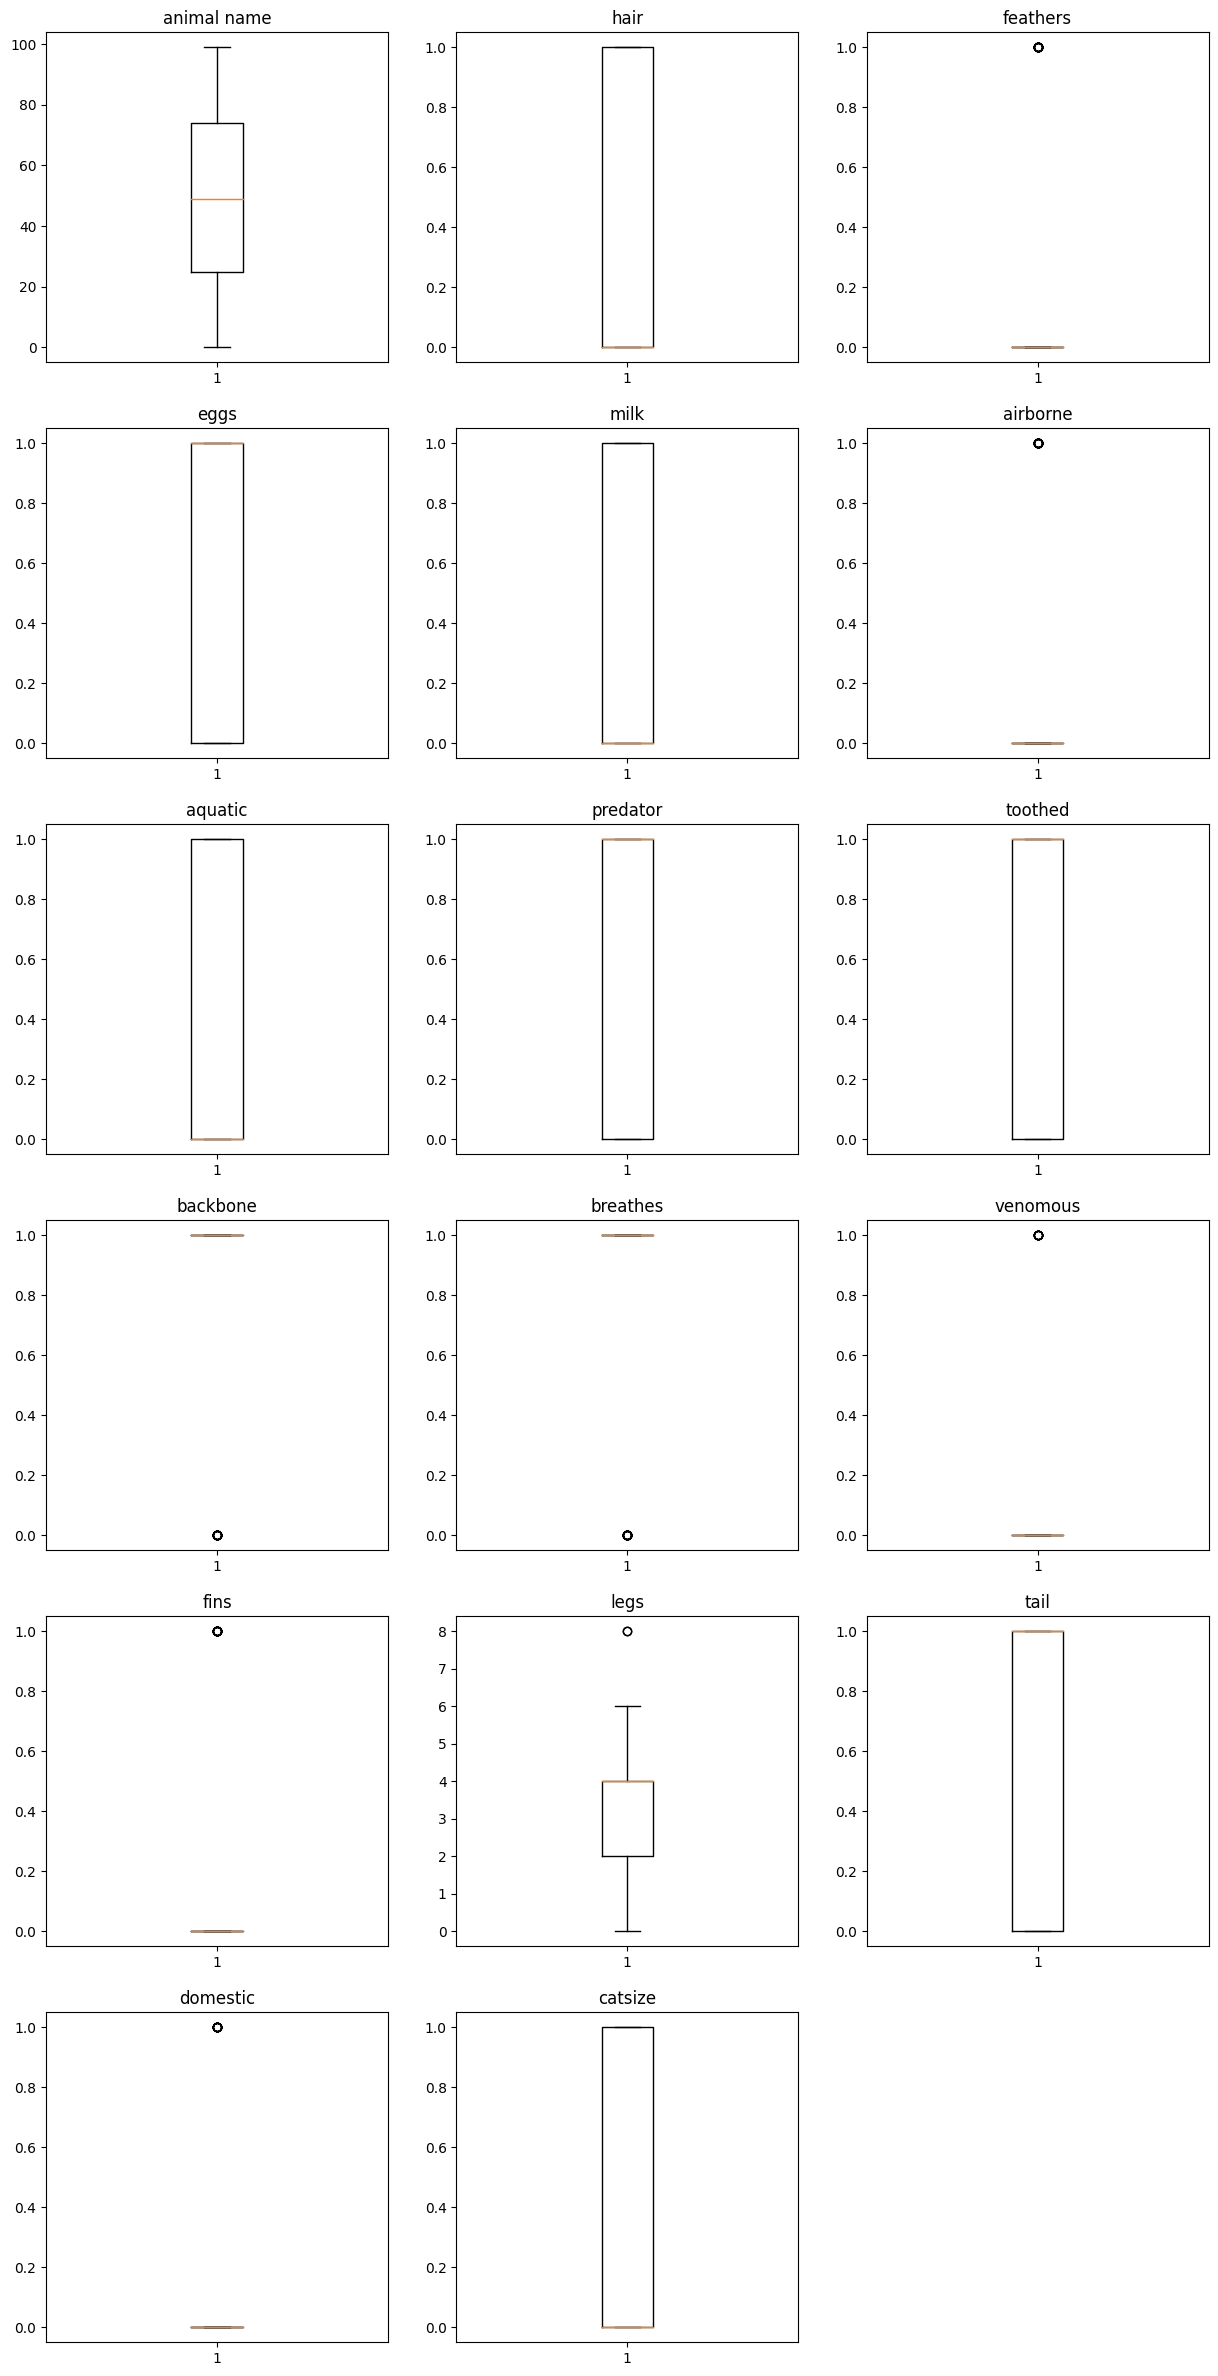

In [16]:
# display boxplots

num_columns = len(numeric_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [17]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    # new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    # new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: animal name
Empty DataFrame
Columns: [animal name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, type]
Index: []


Column Name: hair
Empty DataFrame
Columns: [animal name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize, type]
Index: []


Column Name: feathers
     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
95            94     0         1     1     0         1        0         1   
100           99     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
95         0         1         1         0     0     2     1         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
95         1     2  
100        0     2  


Column Name: eggs
Empty DataFrame

Note: not removing outliers, 

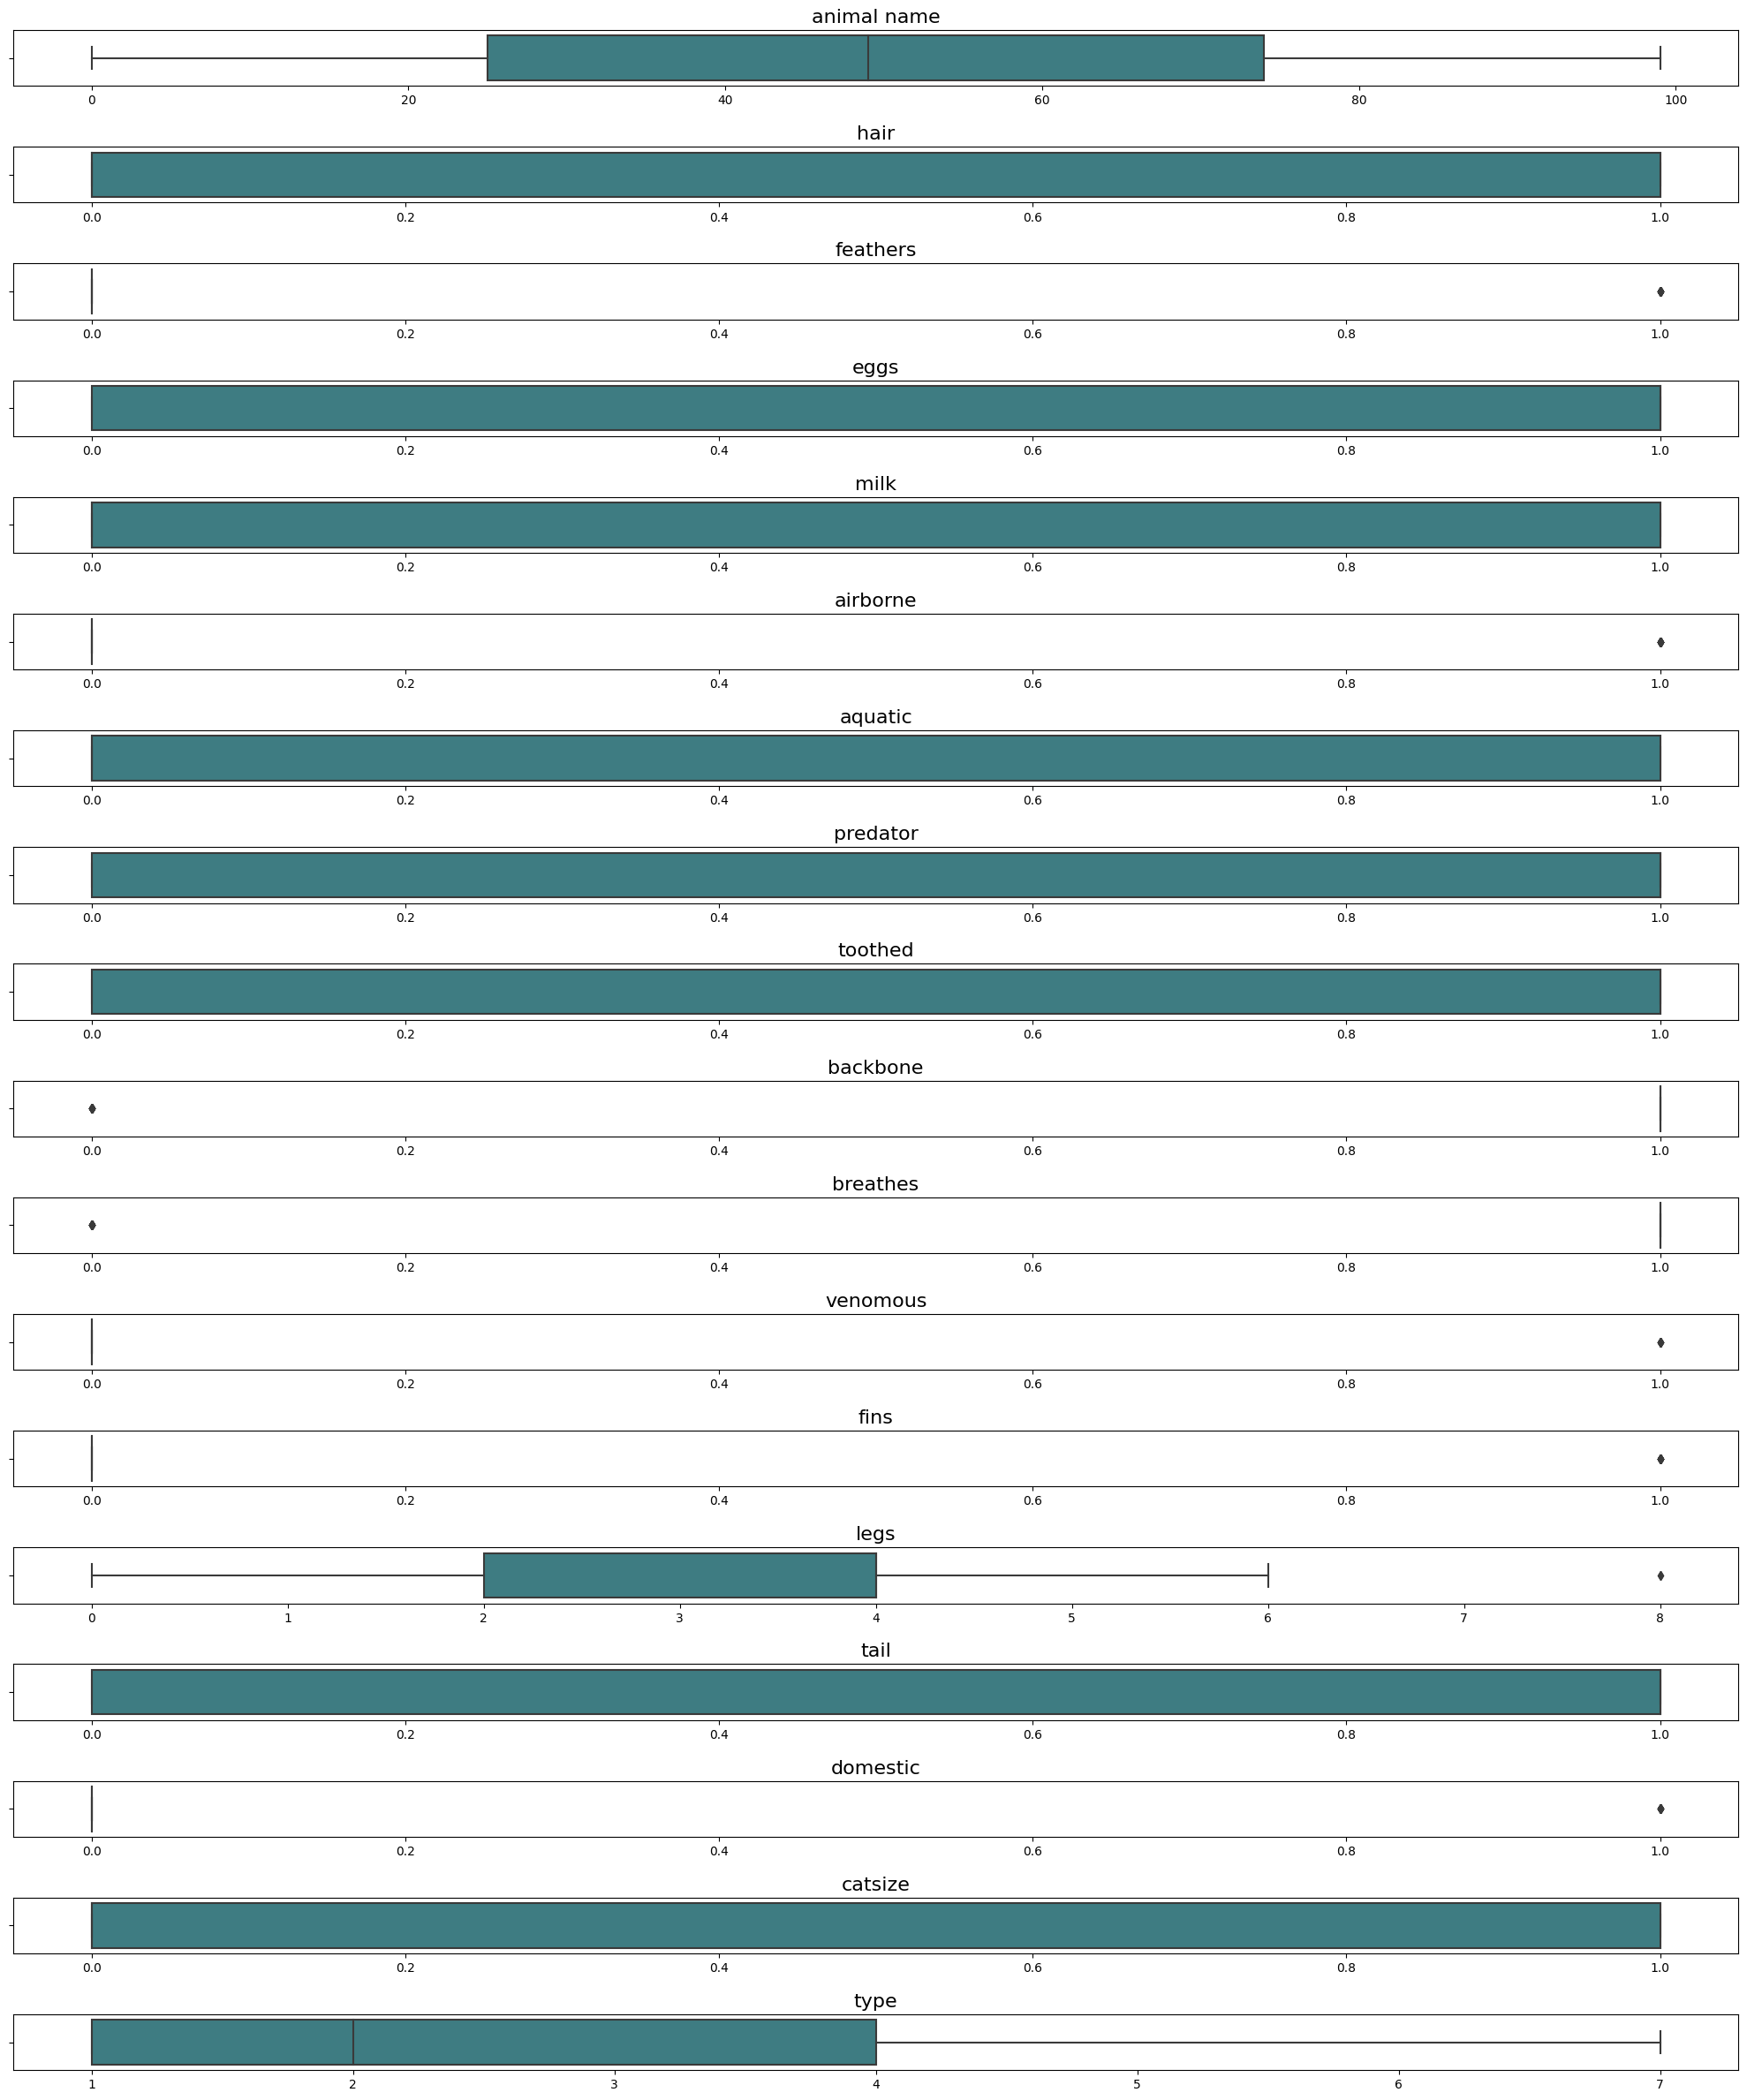

In [18]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 24), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


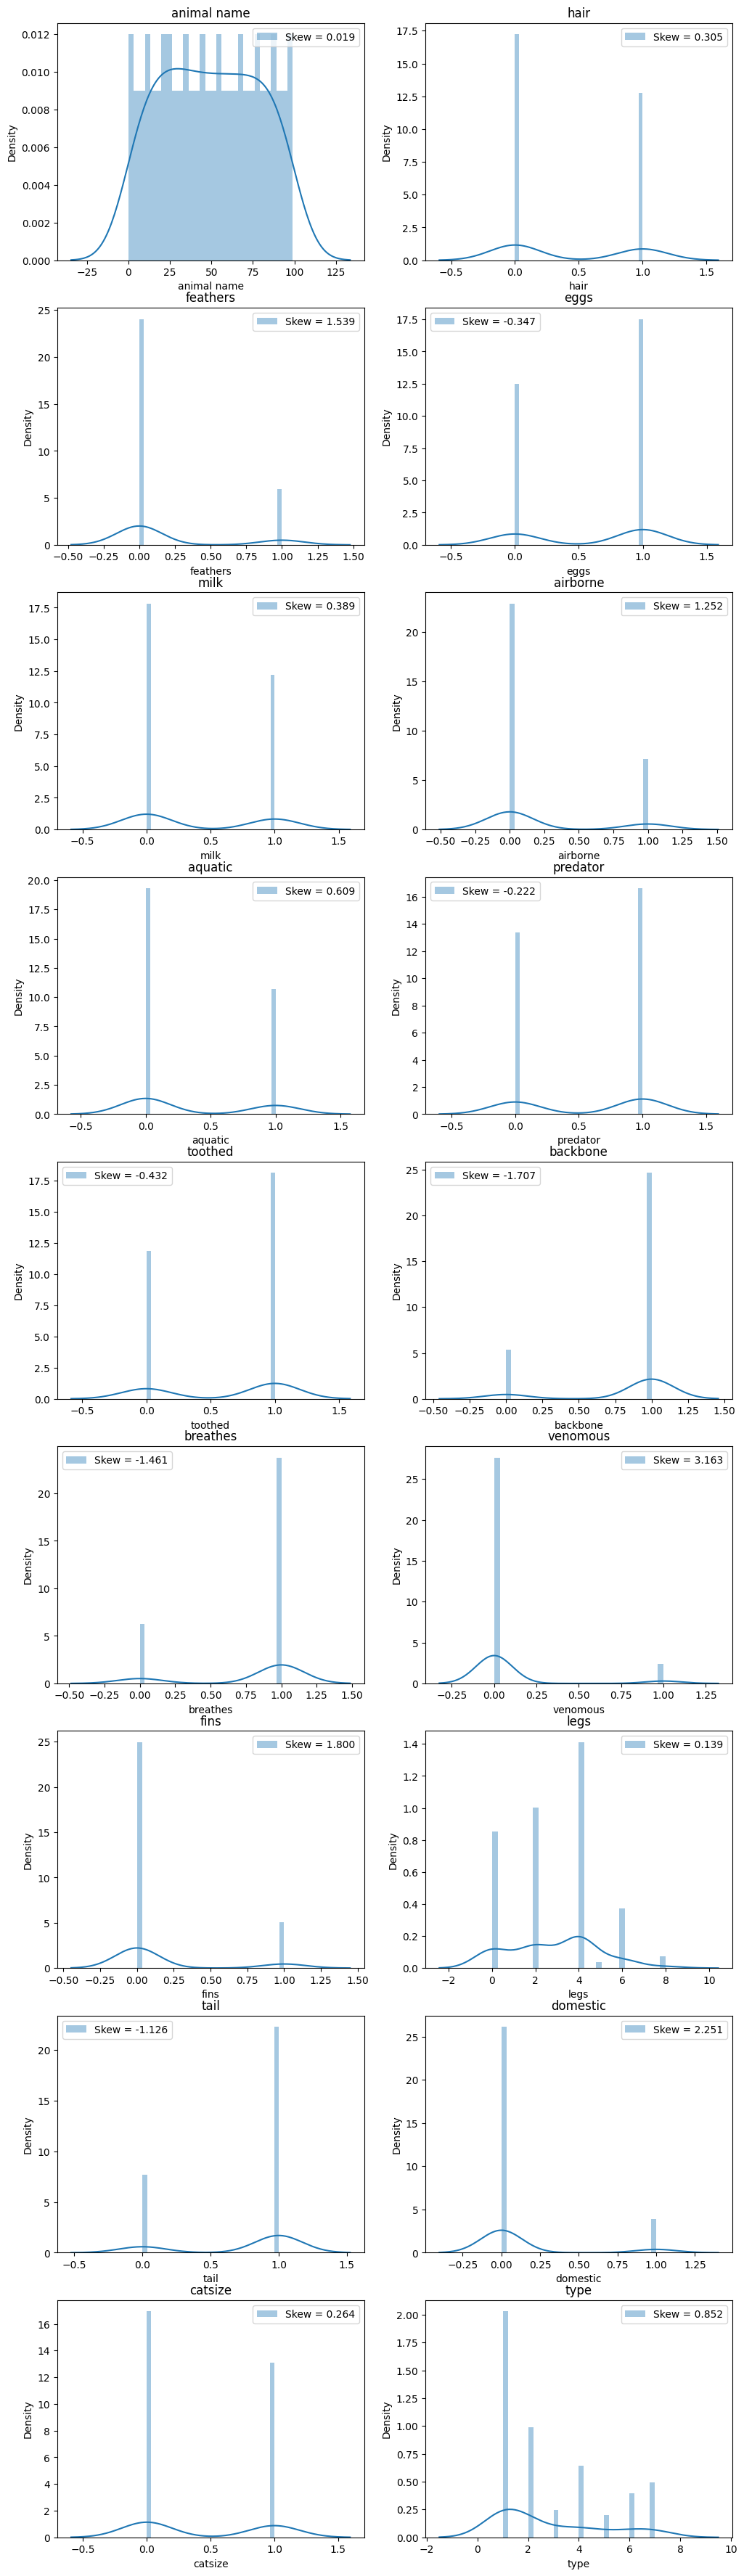

In [19]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


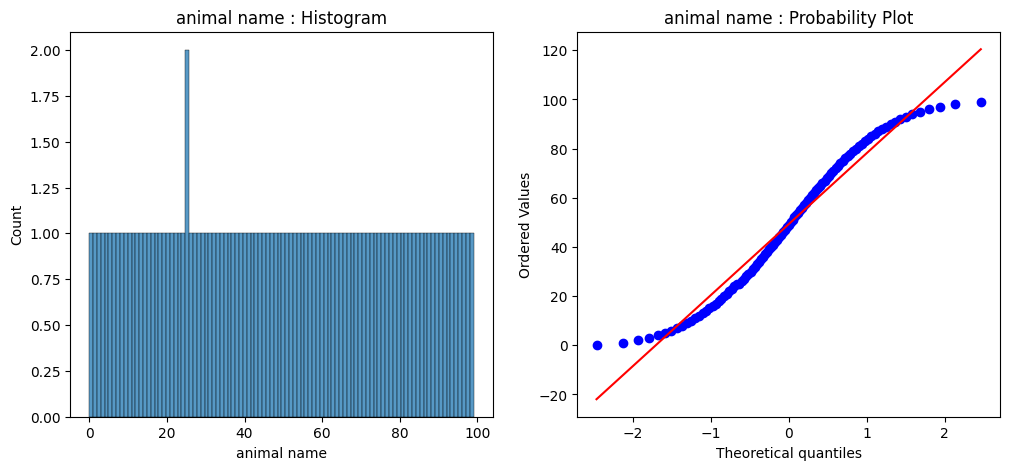

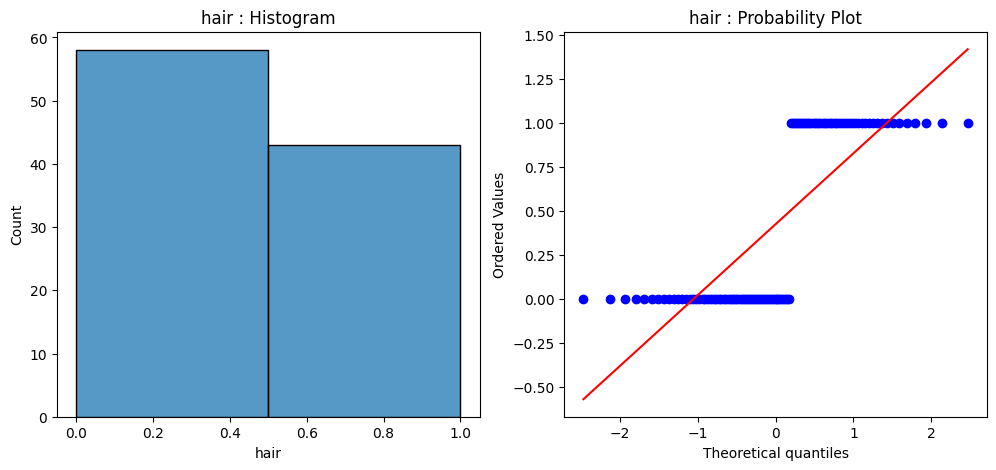

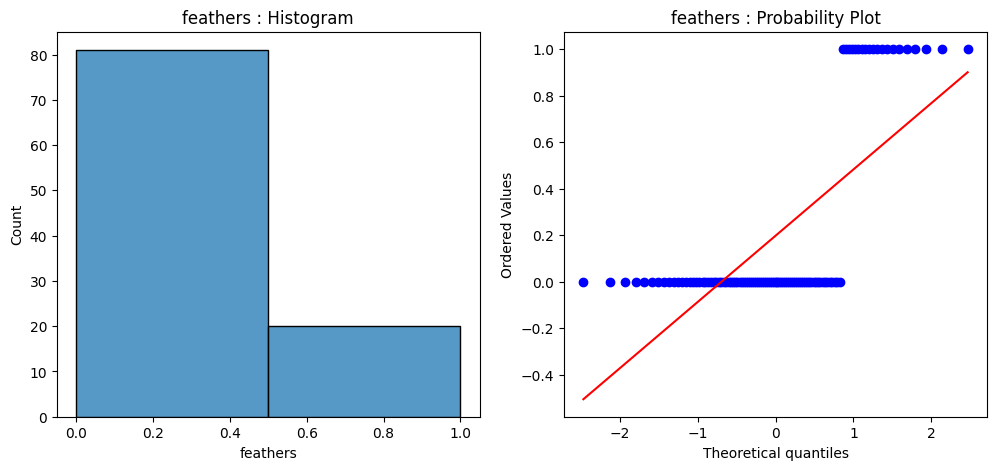

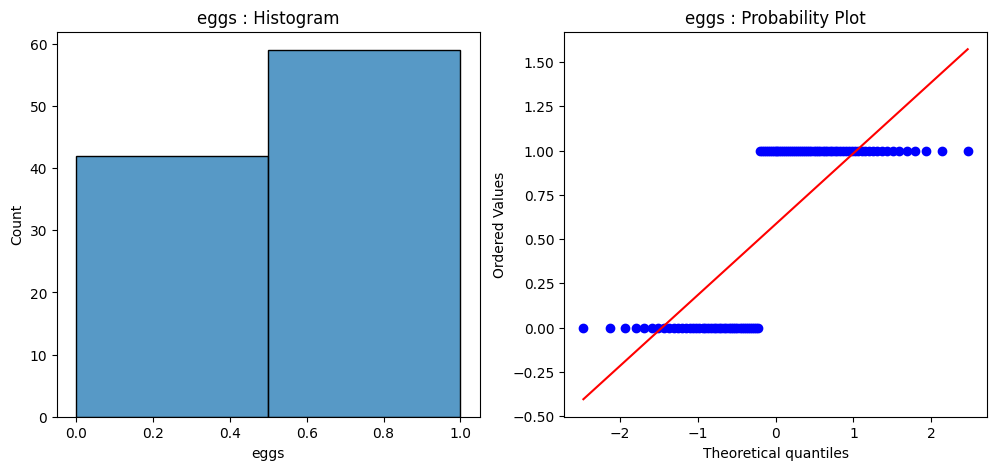

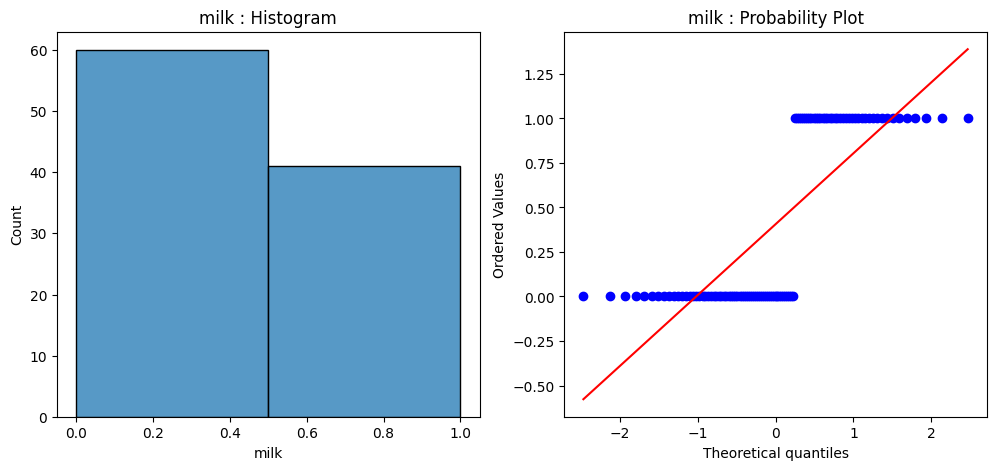

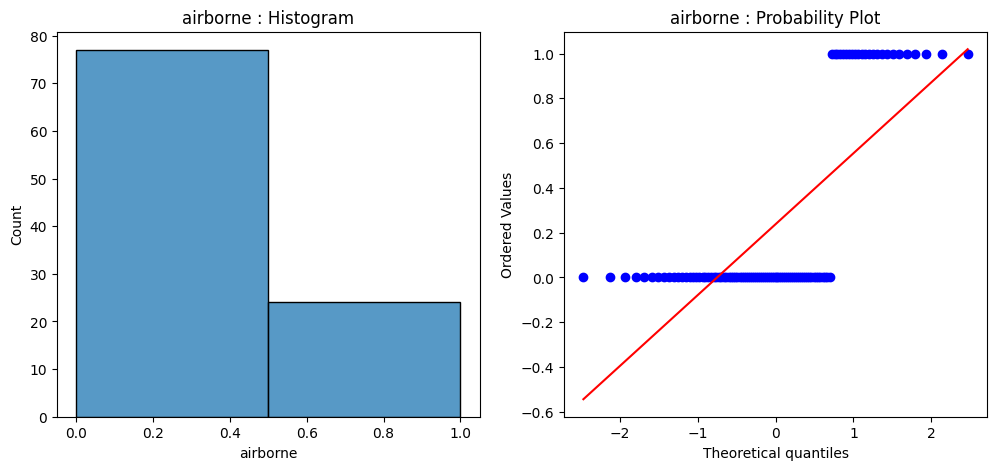

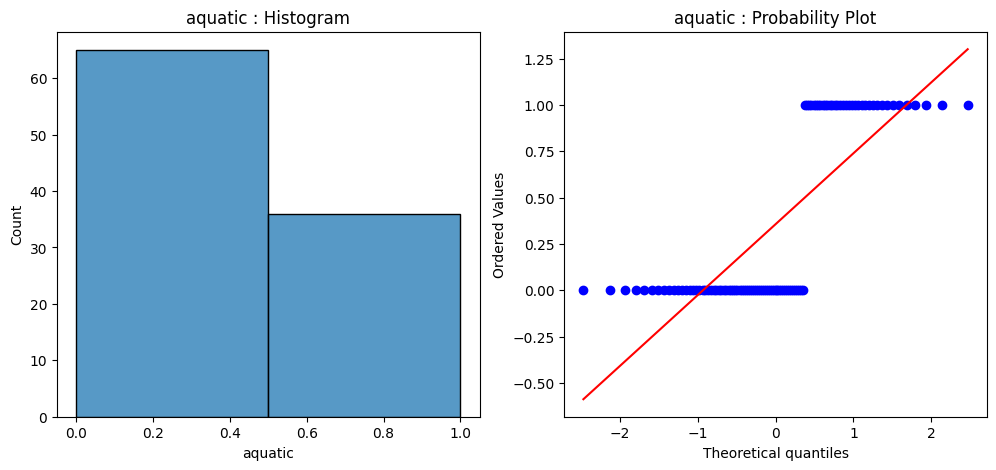

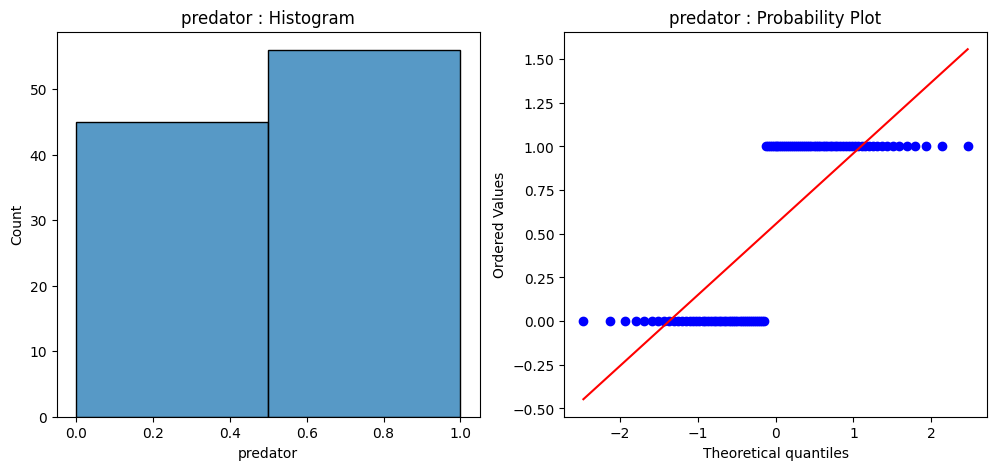

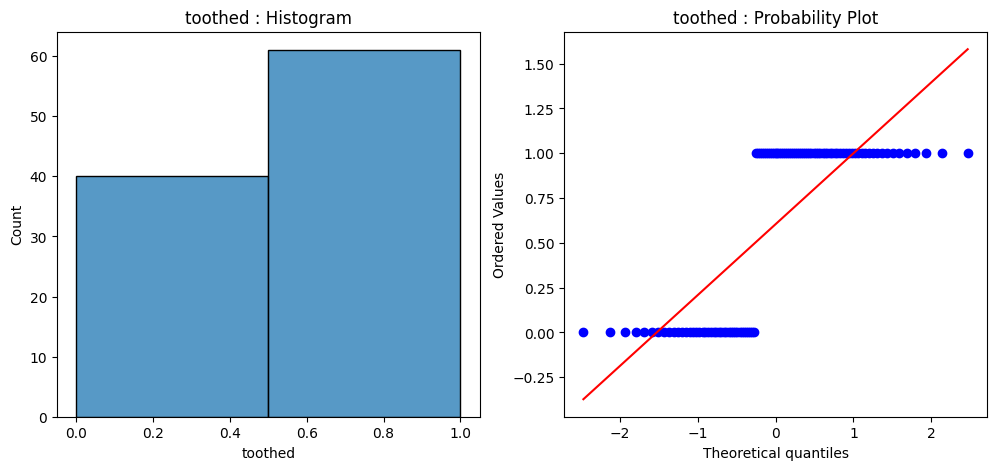

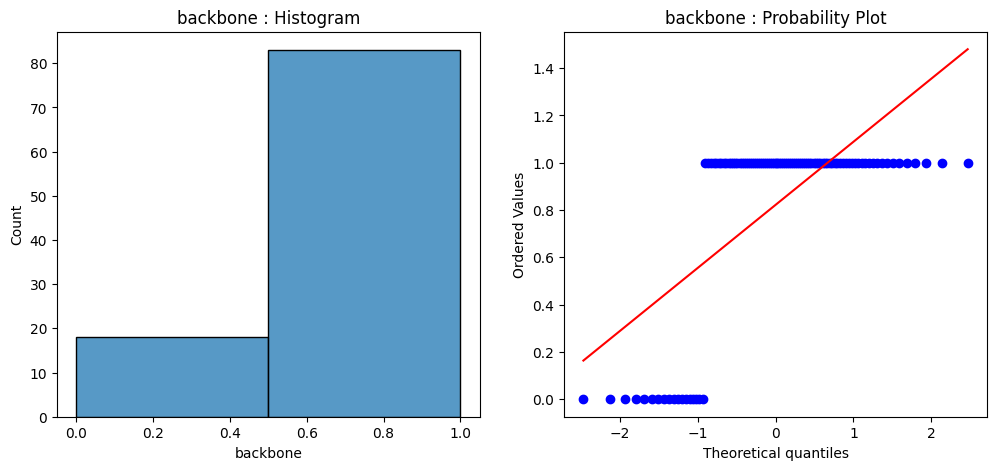

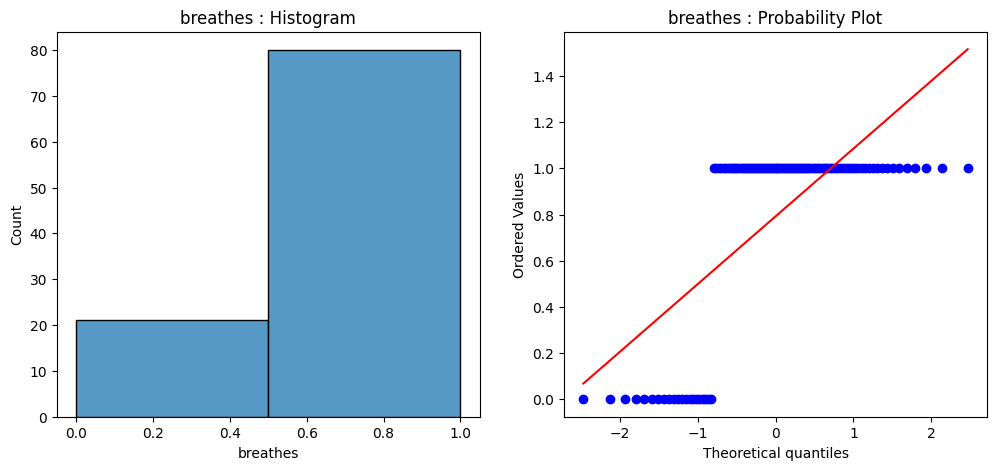

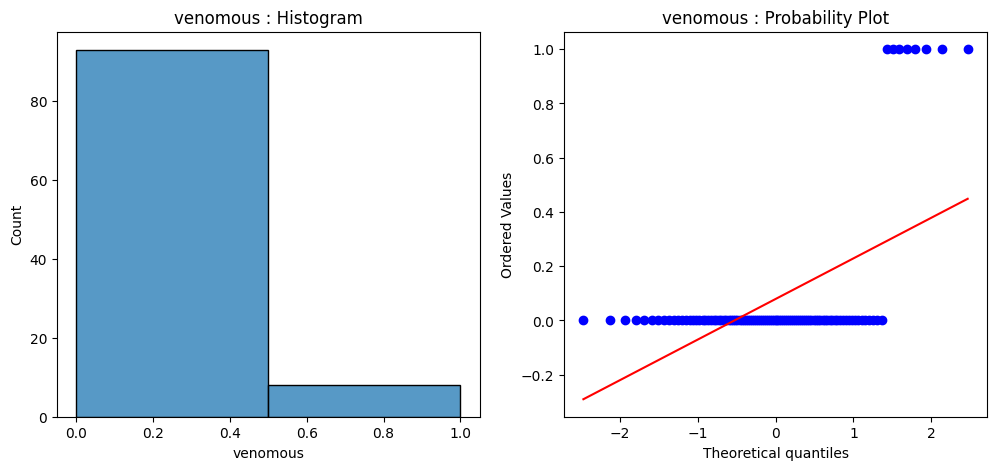

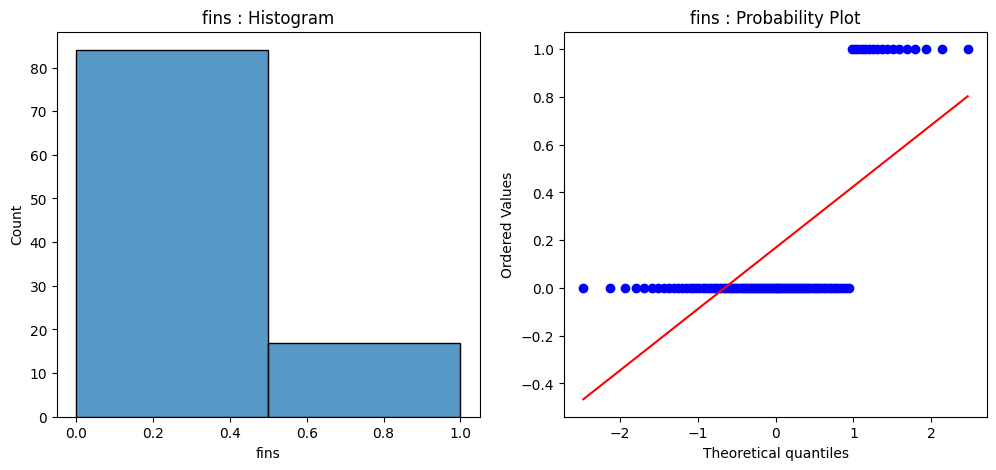

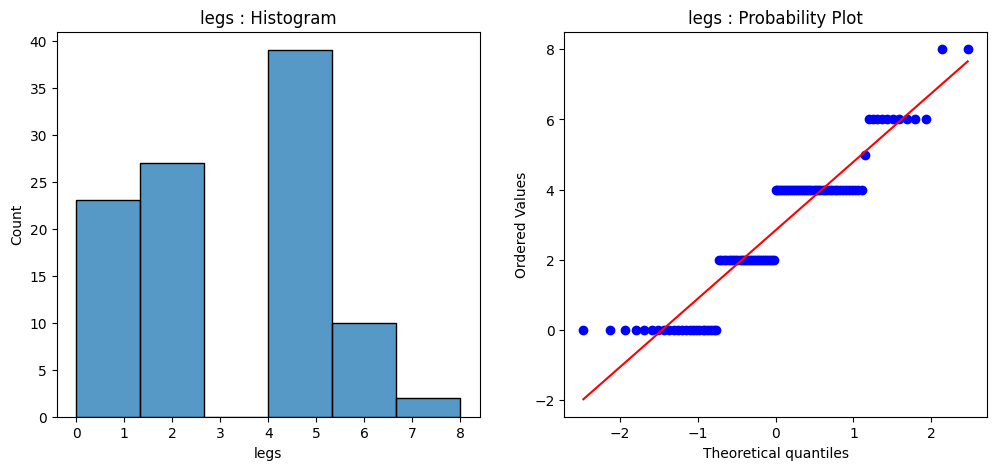

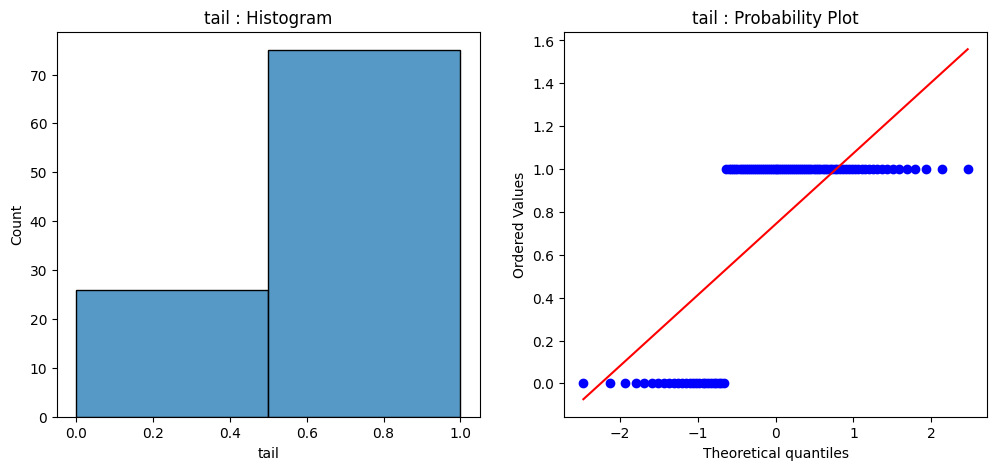

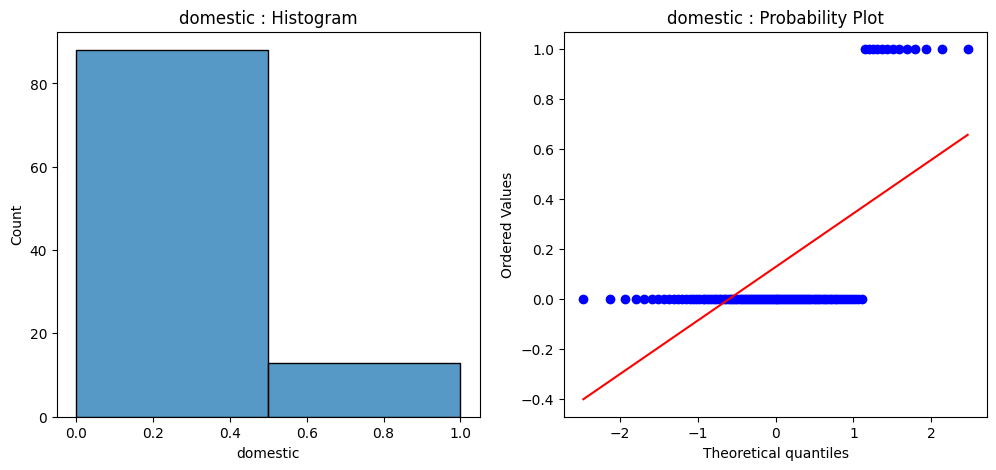

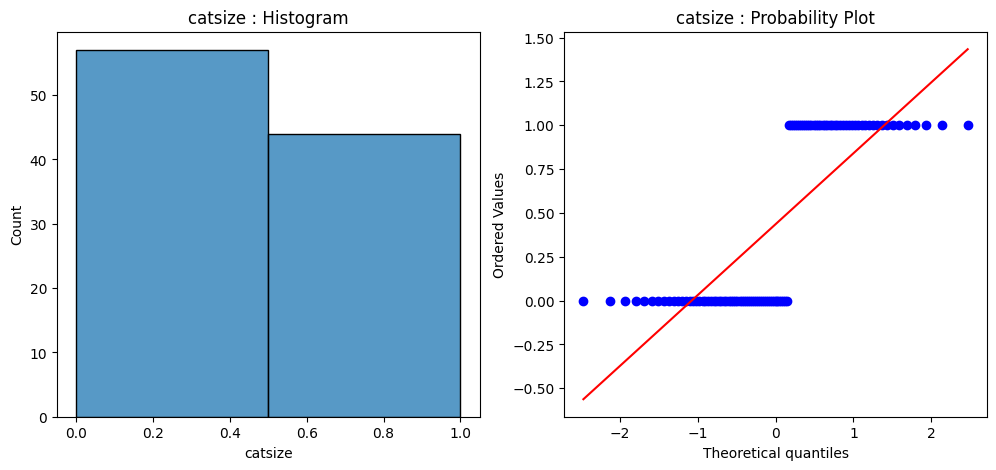

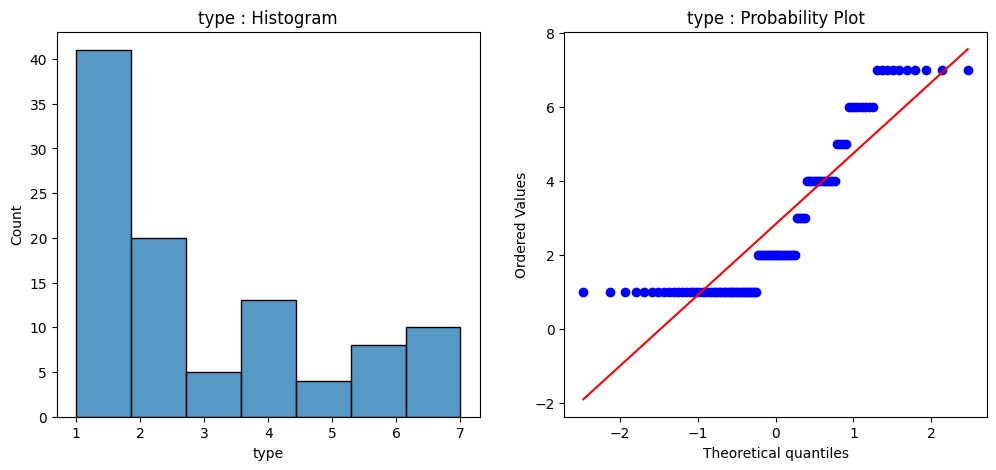

In [20]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


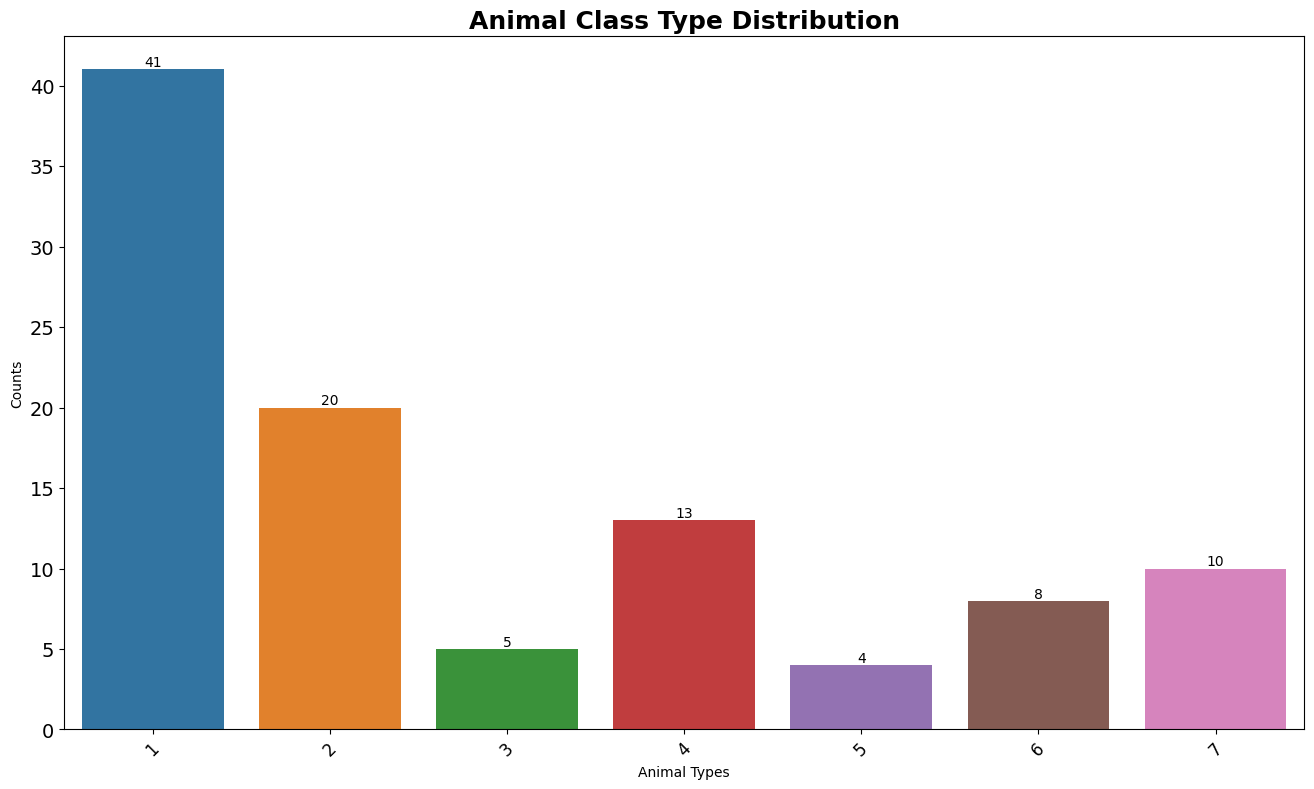

In [21]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = new_data['type'].value_counts().index.tolist(), y = new_data['type'].value_counts().tolist()) 
                # 'ax' -  to add labels to the bars
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,)

# Model Building  & Testing

In [22]:
# x_train = new_data.iloc[:,:-1]    # new_data
# y_train = new_data.iloc[:,-1]
# x_test = new_data.iloc[:,:-1]
# y_test = new_data.iloc[:,-1]

X = new_data.drop(['animal name','type'],axis=1)   #without animal name, getting more accuracy
y = new_data[['type']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)
X_train

Shape of X_train:  (80, 16)
Shape of X_test:  (21, 16)
Shape of y_train:  (80, 1)
Shape of y_test (21, 1)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


## standardization

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.19341628, -0.48038446, -1.25723711, ..., -1.52752523,
        -0.3560345 ,  1.1055416 ],
       [ 1.19341628, -0.48038446,  0.79539491, ..., -1.52752523,
        -0.3560345 , -0.90453403],
       [ 1.19341628, -0.48038446,  0.79539491, ..., -1.52752523,
         2.80871659, -0.90453403],
       ...,
       [-0.83793058, -0.48038446, -1.25723711, ...,  0.65465367,
        -0.3560345 , -0.90453403],
       [-0.83793058, -0.48038446,  0.79539491, ...,  0.65465367,
        -0.3560345 , -0.90453403],
       [-0.83793058,  2.081666  ,  0.79539491, ...,  0.65465367,
        -0.3560345 , -0.90453403]])

# KNeighborsClassifier

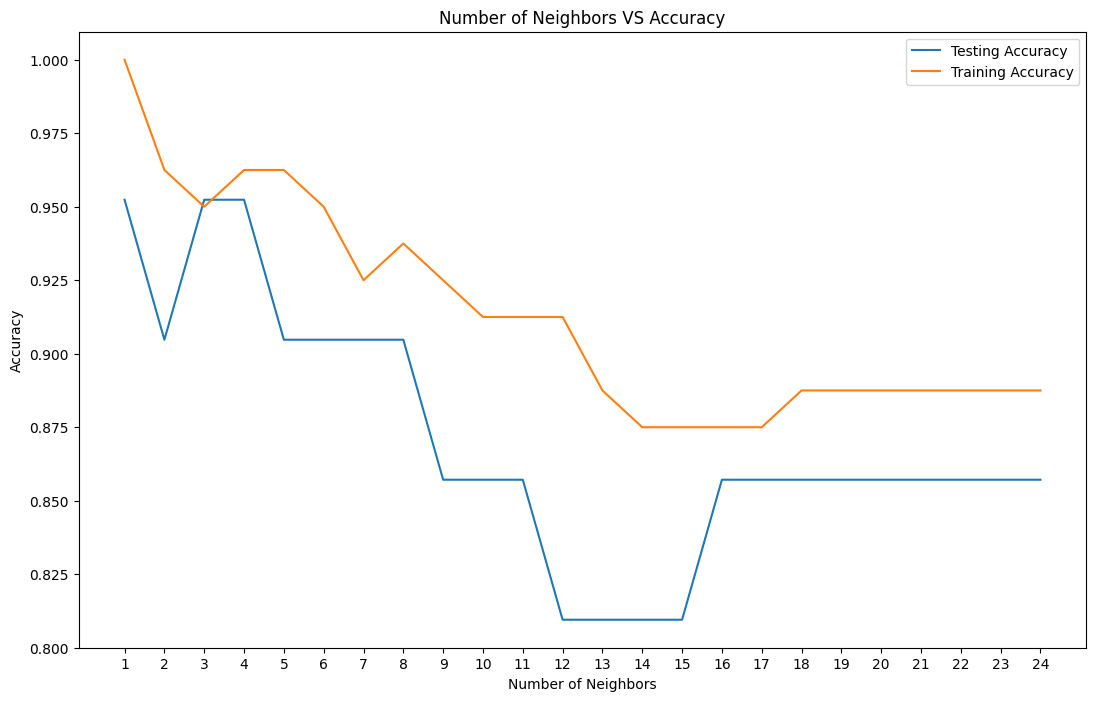

In [24]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

from sklearn.neighbors import KNeighborsClassifier
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Number of Neighbors VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
scores = []
cv_scores = []
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)
score_knn=cross_val_score(knn, X,y, cv=10)
print('',score_knn.mean())
score_knn

 0.95


array([1. , 1. , 1. , 1. , 1. , 0.9, 0.9, 0.9, 0.9, 0.9])

In [26]:
print('',score_knn.mean())
print('',score_knn.std()*2)

 0.95
 0.09999999999999999


Confusion Matrix:

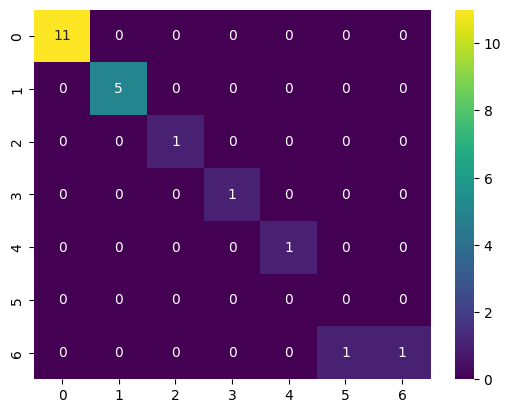

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_KNeighborsClassifier), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

compare the actual with the predicted:

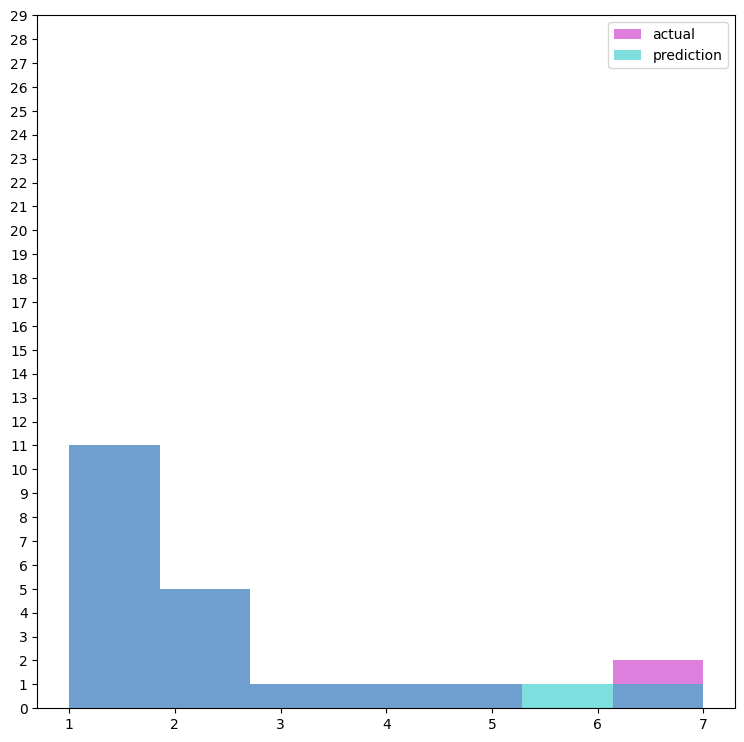

In [28]:
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred_KNeighborsClassifier, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

Precision, Recall, and F1-Score:

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_KNeighborsClassifier, average='weighted')
recall = recall_score(y_test, y_pred_KNeighborsClassifier, average='weighted')
f1 = f1_score(y_test, y_pred_KNeighborsClassifier, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 1.0, Recall: 0.9523809523809523, F1-Score: 0.9682539682539681


Receiver Operating Characteristic (ROC) Curve: Multi Classification problem

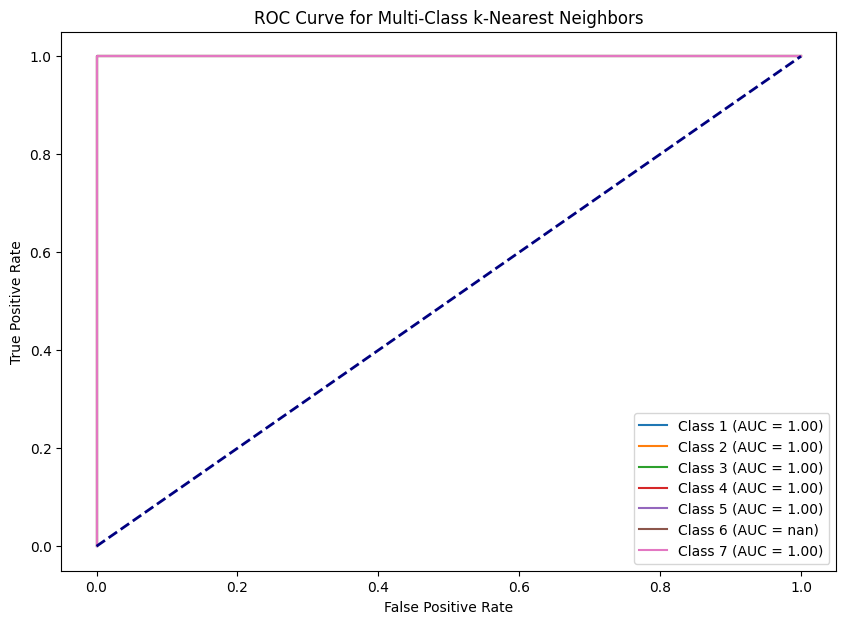

In [30]:
from sklearn.metrics import roc_curve, auc
y_score = knn.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
uniq_out=np.unique(y_train)
num_classes = len(np.unique(y_train))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

Cross-Validation:

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.9375 0.9375 1.     0.9375 0.9375]
Mean Accuracy: 0.95
